In [1]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

In [2]:
# Put in the location of the video file that has to  be processed
location_videofile = "ellen.mp4"

In [3]:
# Build the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

In [4]:
# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)

  0%|          | 0/1849 [00:00<?, ?frames/s]

27-10-2021:02:52:16,971 INFO     [classes.py:199] 30.00 fps, 1849 frames, 61.63 seconds
27-10-2021:02:52:16,974 INFO     [classes.py:207] Making directories at output


100%|██████████| 1849/1849 [2:46:26<00:00,  5.40s/frames]   


27-10-2021:05:38:43,852 INFO     [classes.py:320] Completed analysis: saved to output\ellen_output.mp4
27-10-2021:05:38:43,853 INFO     [classes.py:327] Starting to Zip
27-10-2021:05:38:44,852 INFO     [classes.py:338] Compressing: 2%
27-10-2021:05:38:45,864 INFO     [classes.py:338] Compressing: 4%
27-10-2021:05:38:46,747 INFO     [classes.py:338] Compressing: 7%
27-10-2021:05:38:47,678 INFO     [classes.py:338] Compressing: 9%
27-10-2021:05:38:48,882 INFO     [classes.py:338] Compressing: 12%
27-10-2021:05:38:49,924 INFO     [classes.py:338] Compressing: 14%
27-10-2021:05:38:50,828 INFO     [classes.py:338] Compressing: 16%
27-10-2021:05:38:51,690 INFO     [classes.py:338] Compressing: 19%
27-10-2021:05:38:52,638 INFO     [classes.py:338] Compressing: 21%
27-10-2021:05:38:53,567 INFO     [classes.py:338] Compressing: 24%
27-10-2021:05:38:54,551 INFO     [classes.py:338] Compressing: 26%
27-10-2021:05:38:55,379 INFO     [classes.py:338] Compressing: 28%
27-10-2021:05:38:56,294 INFO   

In [5]:
# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

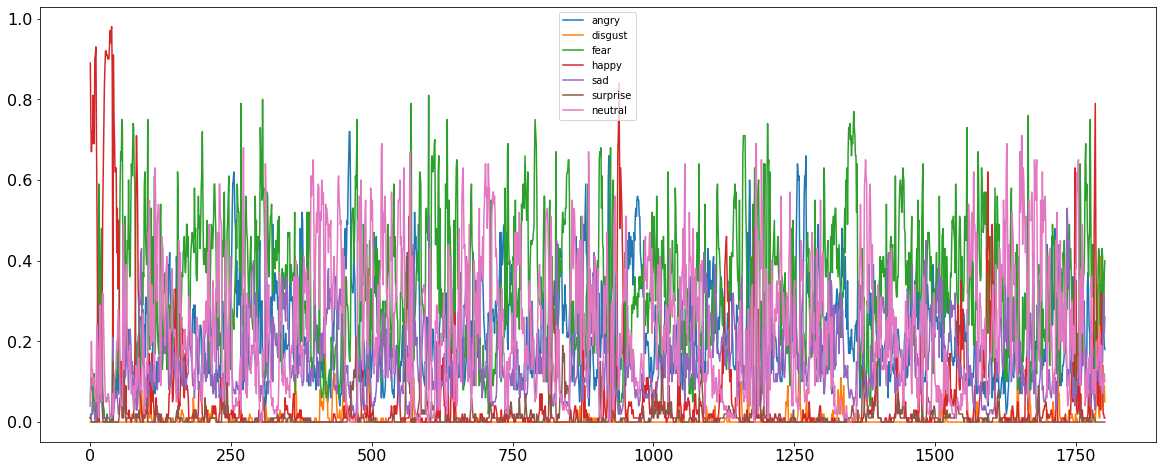

In [6]:
# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

In [7]:
# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)


In [8]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

In [9]:
score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

,Human Emotions,Emotion Value from the Video
0,Angry,375.05
1,Disgust,13.56
2,Fear,590.94
3,Happy,99.98
4,Sad,272.12
5,Surprise,30.27
6,Neutral,418.01
